In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, svm , preprocessing
from sklearn import *
from churn_measurements import calibration, discrimination
from sklearn.cross_validation import KFold
import seaborn as sns
from sklearn import cross_validation

In [4]:
df = pd.read_csv("data/churn.csv") 

In [5]:
df.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge   ...    Eve Calls  \
0             25     265.1        110       45.07   ...           99   
1             26     161.6        123       27.47   ...          103   
2              0     243.4        114       41.38   ...          110   
3              0     299.4         71       50.90   ...           88   
4              0     166.7        113       28.34   ...          122   

   Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  \
0       16.78       244.7           91         11.01       10.0           3   
1       16.62       254.4          103         11.45       13.7           3   
2       10.30       162.6          104          7.32       12.2           5   
3        5.26       196.9           89          8.86        6.6           7   
4       12.61       186.9          121          8.41       10.1           3   

   Intl Charge  CustServ Calls  Churn?  
0         2.70               1  False.  
1         3.70               1  False.  
2         3.29               0  False.  
3         1.78               2  False.  
4         2.73               3  False.  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 572.9+ KB


In [7]:
LB = preprocessing.LabelBinarizer()

In [8]:
df["Churn?"] = LB.fit_transform(df['Churn?'])

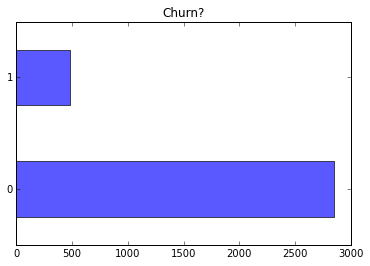

In [9]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df["Churn?"].value_counts().plot(kind='barh', color="blue", alpha=.65)
plt.title("Churn?")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108be3d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118d18fd0>]], dtype=object)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


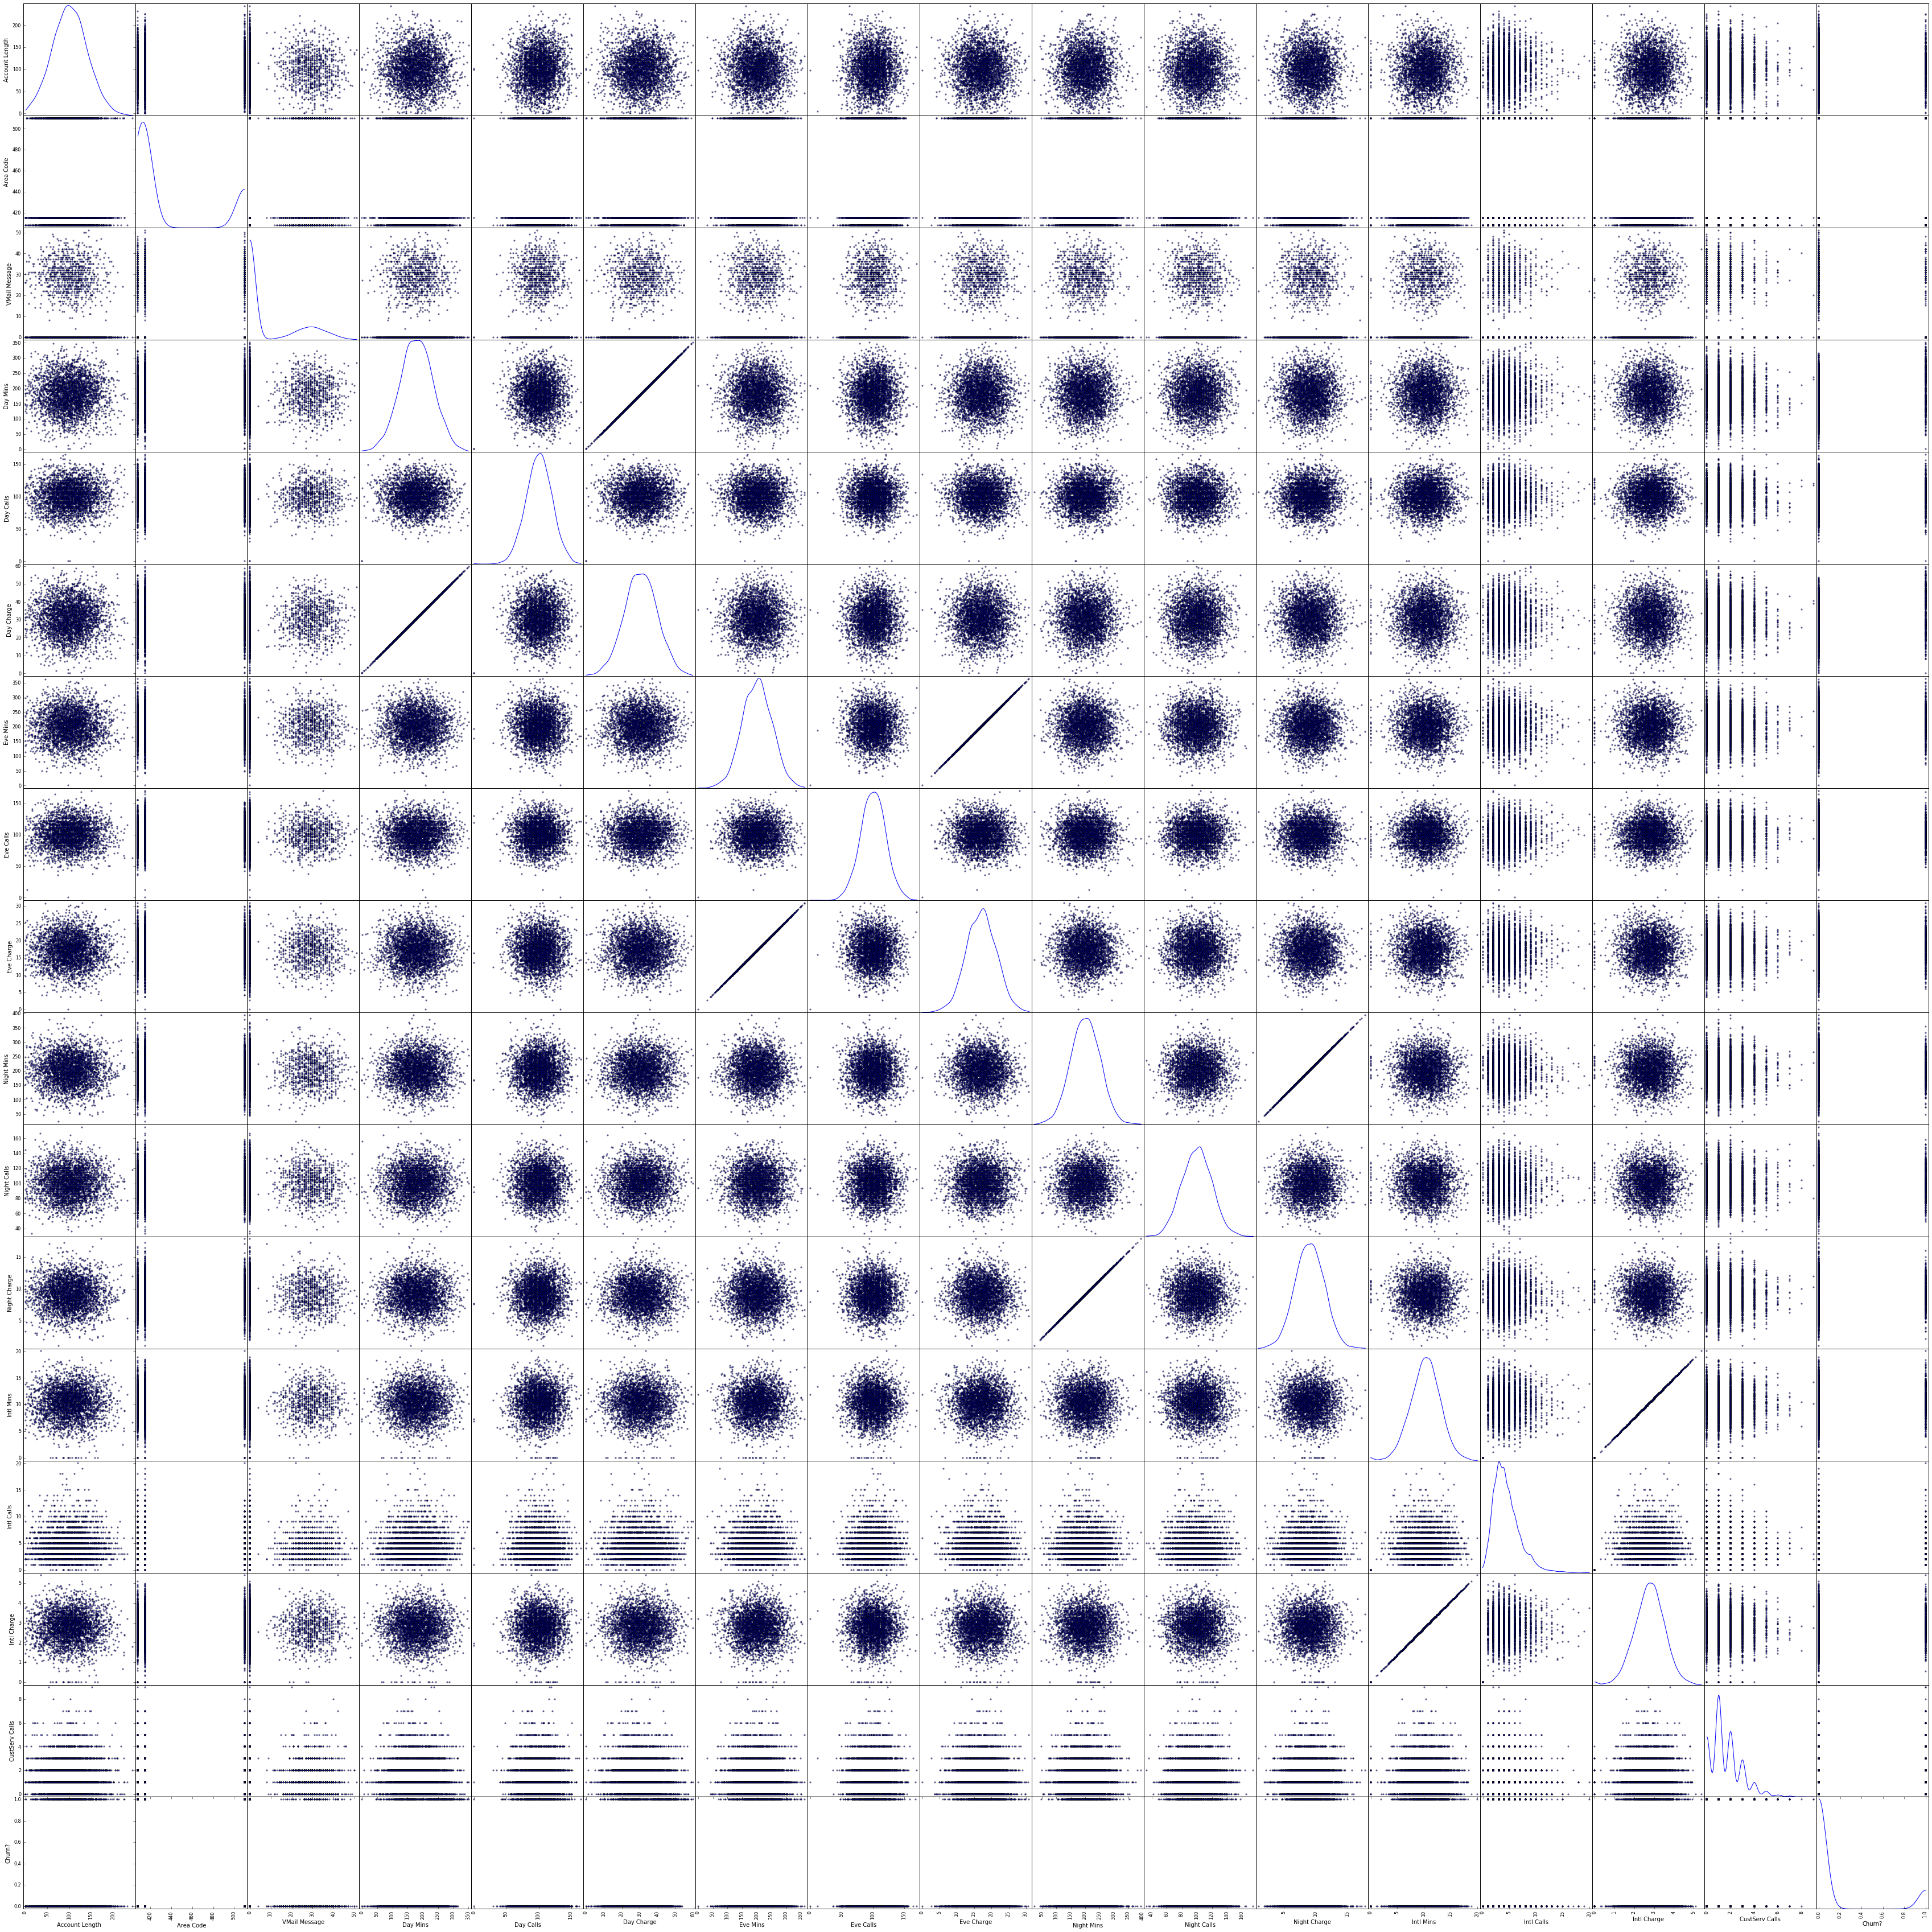

In [10]:
pd.scatter_matrix(df,figsize=(60, 60), diagonal='kde')

In [12]:
df.corr()

Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
Account Length        1.000000  -0.012463      -0.004628  0.006216   0.038470   
Area Code            -0.012463   1.000000      -0.001994 -0.008264  -0.009646   
VMail Message        -0.004628  -0.001994       1.000000  0.000778  -0.009548   
Day Mins              0.006216  -0.008264       0.000778  1.000000   0.006750   
Day Calls             0.038470  -0.009646      -0.009548  0.006750   1.000000   
Day Charge            0.006214  -0.008264       0.000776  1.000000   0.006753   
Eve Mins             -0.006757   0.003580       0.017562  0.007043  -0.021451   
Eve Calls             0.019260  -0.011886      -0.005864  0.015769   0.006462   
Eve Charge           -0.006745   0.003607       0.017578  0.007029  -0.021449   
Night Mins           -0.008955  -0.005825       0.007681  0.004323   0.022938   
Night Calls          -0.013176   0.016522       0.007123  0.022972  -0.019557   
Night Charge         -0.008960  -0.005845       0.007663  0.004300   0.022927   
Intl Mins             0.009514  -0.018288       0.002856 -0.010155   0.021565   
Intl Calls            0.020661  -0.024179       0.013957  0.008033   0.004574   
Intl Charge           0.009546  -0.018395       0.002884 -0.010092   0.021666   
CustServ Calls       -0.003796   0.027572      -0.013263 -0.013423  -0.018942   
Churn?                0.016541   0.006174      -0.089728  0.205151   0.018459   

                Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
Account Length    0.006214 -0.006757   0.019260   -0.006745   -0.008955   
Area Code        -0.008264  0.003580  -0.011886    0.003607   -0.005825   
VMail Message     0.000776  0.017562  -0.005864    0.017578    0.007681   
Day Mins          1.000000  0.007043   0.015769    0.007029    0.004323   
Day Calls         0.006753 -0.021451   0.006462   -0.021449    0.022938   
Day Charge        1.000000  0.007050   0.015769    0.007036    0.004324   
Eve Mins          0.007050  1.000000  -0.011430    1.000000   -0.012584   
Eve Calls         0.015769 -0.011430   1.000000   -0.011423   -0.002093   
Eve Charge        0.007036  1.000000  -0.011423    1.000000   -0.012592   
Night Mins        0.004324 -0.012584  -0.002093   -0.012592    1.000000   
Night Calls       0.022972  0.007586   0.007710    0.007596    0.011204   
Night Charge      0.004301 -0.012593  -0.002056   -0.012601    0.999999   
Intl Mins        -0.010157 -0.011035   0.008703   -0.011043   -0.015207   
Intl Calls        0.008032  0.002541   0.017434    0.002541   -0.012353   
Intl Charge      -0.010094 -0.011067   0.008674   -0.011074   -0.015180   
CustServ Calls   -0.013427 -0.012985   0.002423   -0.012987   -0.009288   
Churn?            0.205151  0.092796   0.009233    0.092786    0.035493   

                Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
Account Length    -0.013176     -0.008960   0.009514    0.020661     0.009546   
Area Code          0.016522     -0.005845  -0.018288   -0.024179    -0.018395   
VMail Message      0.007123      0.007663   0.002856    0.013957     0.002884   
Day Mins           0.022972      0.004300  -0.010155    0.008033    -0.010092   
Day Calls         -0.019557      0.022927   0.021565    0.004574     0.021666   
Day Charge         0.022972      0.004301  -0.010157    0.008032    -0.010094   
Eve Mins           0.007586     -0.012593  -0.011035    0.002541    -0.011067   
Eve Calls          0.007710     -0.002056   0.008703    0.017434     0.008674   
Eve Charge         0.007596     -0.012601  -0.011043    0.002541    -0.011074   
Night Mins         0.011204      0.999999  -0.015207   -0.012353    -0.015180   
Night Calls        1.000000      0.011188  -0.013605    0.000305    -0.013630   
Night Charge       0.011188      1.000000  -0.015214   -0.012329    -0.015186   
Intl Mins         -0.013605     -0.015214   1.000000    0.032304     0.999993   
Intl Calls         0.000305     -0.012329   0.032304    1.000000     0.0

//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


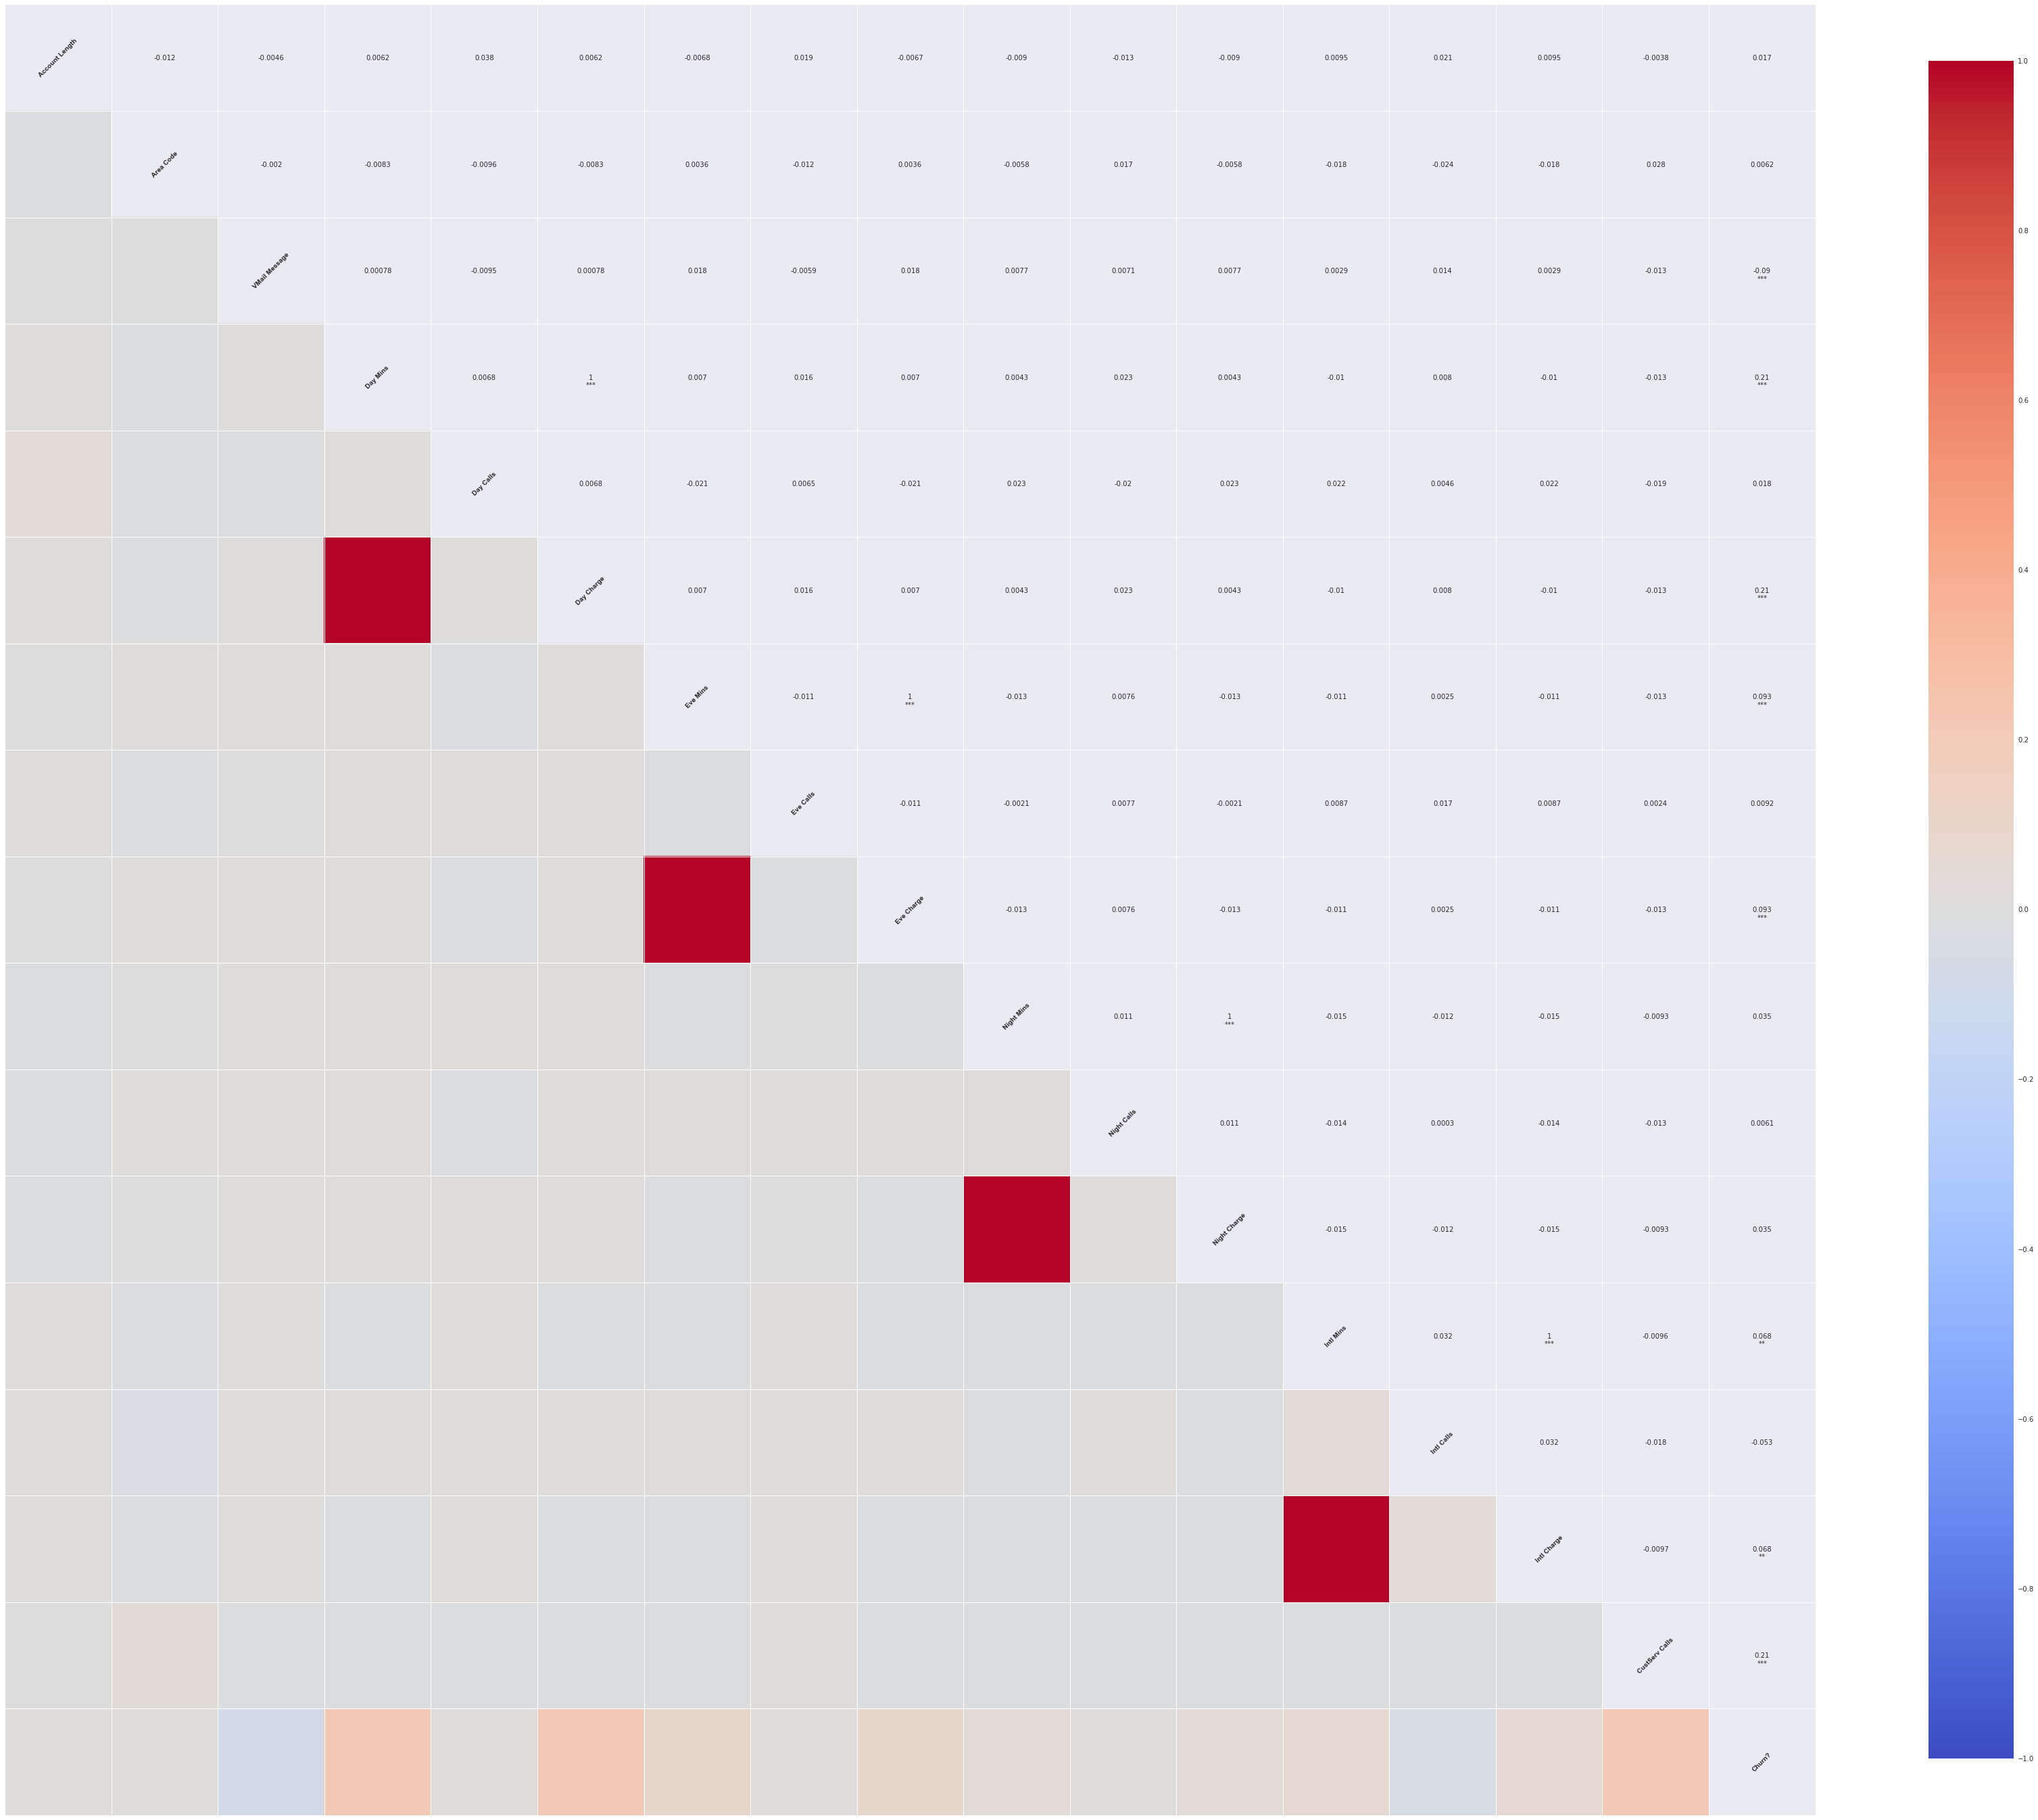

In [13]:
fig, ax = plt.subplots(figsize=(60, 60))
sns.corrplot(df,ax=ax)

In [14]:
df.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?'],
      dtype='object')

In [15]:
df.columns = [u'State', u'Account Length', u'Area Code', u'Phone', u'Intl Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?']

In [16]:
# Remove charge features as they're correlated with minutes

In [17]:
Features_list = ['State', 'Account Length', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Eve Mins', 'Eve Calls', 'Night Mins',
       'Night Calls', 'Intl Mins', 'Intl Calls', 'CustServ Calls']

In [18]:
Labels = ['Churn?']

In [19]:
X = df[Features_list]
y = df[Labels]

In [20]:
label_encoder = preprocessing.LabelEncoder()

In [21]:
X['Intl Plan'] = label_encoder.fit_transform(X['Intl Plan'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
X['VMail Plan'] = label_encoder.fit_transform(X['VMail Plan'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
X = pd.get_dummies(X)

In [24]:
X = X.drop("State_WY",axis=1)

In [25]:
scaler = preprocessing.StandardScaler()

In [26]:
X[[u'Account Length', 
        u'VMail Message',       u'Day Mins',      u'Day Calls',
             u'Eve Mins',      u'Eve Calls',     u'Night Mins',
          u'Night Calls',      u'Intl Mins',     u'Intl Calls',
       u'CustServ Calls']] = scaler.fit_transform(X[[u'Account Length', 
        u'VMail Message',       u'Day Mins',      u'Day Calls',
             u'Eve Mins',      u'Eve Calls',     u'Night Mins',
          u'Night Calls',      u'Intl Mins',     u'Intl Calls',
       u'CustServ Calls']])

In [27]:
X.head()

Account Length  Intl Plan  VMail Plan  VMail Message  Day Mins  Day Calls  \
0        0.676489          0           1       1.234883  1.566767   0.476643   
1        0.149065          0           1       1.307948 -0.333738   1.124503   
2        0.902529          0           0      -0.591760  1.168304   0.675985   
3       -0.428590          1           0      -0.591760  2.196596  -1.466936   
4       -0.654629          1           0      -0.591760 -0.240090   0.626149   

   Eve Mins  Eve Calls  Night Mins  Night Calls    ...     State_SC  State_SD  \
0 -0.070610  -0.055940    0.866743    -0.465494    ...            0         0   
1 -0.108080   0.144867    1.058571     0.147825    ...            0         0   
2 -1.573383   0.496279   -0.756869     0.198935    ...            0         0   
3 -2.742865  -0.608159   -0.078551    -0.567714    ...            0         0   
4 -1.038932   1.098699   -0.276311     1.067803    ...            0         0   

   State_TN  State_TX  State_UT  State_VA  State_VT  State_WA  State_WI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

   State_WV  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 63 columns]

In [28]:
X.columns[0:13]

Index([u'Account Length',      u'Intl Plan',     u'VMail Plan',
        u'VMail Message',       u'Day Mins',      u'Day Calls',
             u'Eve Mins',      u'Eve Calls',     u'Night Mins',
          u'Night Calls',      u'Intl Mins',     u'Intl Calls',
       u'CustServ Calls'],
      dtype='object')

In [29]:
X = X.as_matrix().astype(np.float)

In [30]:
y = y.as_matrix().astype(np.float)

In [233]:
def cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    k_fold = cross_validation.StratifiedKFold(y.ravel(), n_folds=n_folds, shuffle=shuffle)
    y_pred = y.ravel().copy()
    for ii, jj in k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y.ravel()[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [234]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y,
                                                        cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y,
                                                        cv(X, y, svm.SVC))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y,
                                                        cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y,
                                                        cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y,
                                                        cv(X, y, linear_model.LogisticRegression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.87
Random Forest Classifier:      0.92
K Nearest Neighbor Classifier: 0.88
Logistic Regression:           0.86


In [196]:
print('Gradient Boosting Classifier:\n {}\n'.format(
        metrics.classification_report(y,cv(X, y, ensemble.GradientBoostingClassifier))))
print('Support vector machine(SVM):\n {}\n'.format(
        metrics.classification_report(y,cv(X, y, svm.SVC))))
print('Random Forest Classifier:\n {}\n'.format(
        metrics.classification_report(y,cv(X, y, ensemble.RandomForestClassifier))))
print('K Nearest Neighbor Classifier:\n {}\n'.format(
        metrics.classification_report(y,cv(X, y, neighbors.KNeighborsClassifier))))
print('Logistic Regression:\n {}\n'.format(
        metrics.classification_report(y,cv(X, y, linear_model.LogisticRegression))))
print('Extreme Trees Classifier:\n {}\n'.format(
        metrics.classification_report(y,cv(X, y, ensemble.ExtraTreesClassifier))))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      2850
        1.0       0.92      0.74      0.82       483

avg / total       0.95      0.95      0.95      3333


Support vector machine(SVM):
              precision    recall  f1-score   support

        0.0       0.87      1.00      0.93      2850
        1.0       0.93      0.14      0.25       483

avg / total       0.88      0.87      0.83      3333


Random Forest Classifier:
              precision    recall  f1-score   support

        0.0       0.92      0.99      0.96      2850
        1.0       0.90      0.51      0.65       483

avg / total       0.92      0.92      0.91      3333


K Nearest Neighbor Classifier:
              precision    recall  f1-score   support

        0.0       0.89      0.99      0.94      2850
        1.0       0.85      0.25      0.38       483

avg / total       0.88      0.88      0.86      3333


Logistic Regress

In [46]:
import xgboost as xgb

In [197]:
print('XGBClassifier:  {:.2f}'.format(metrics.accuracy_score(y,cv(X, y, xgb.XGBClassifier))))

XGBClassifier:  0.95


In [48]:
XGB = xgb.XGBClassifier()

In [48]:
params = {'max_depth':[2,3,4], 'n_estimators':[300,500,1000], 'learning_rate':[.01,0.05,.1,1],
          'reg_alpha':[0,1,3,5], 'reg_lambda':[0,1,3,5]
         }

In [ ]:
clf = grid_search.GridSearchCV(XGB, params,scoring='f1',n_jobs=-1,cv=10)

In [ ]:
clf.fit(X,y.ravel())

In [ ]:
clf.best_params_

XGB
{'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 300,
 'reg_alpha': 1,
 'reg_lambda': 0}

In [ ]:
clf.best_score_

### Test Model

In [238]:
results = cv(X, y,  xgb.XGBClassifier,learning_rate=.1,max_depth=4,n_estimators=300,reg_alpha=1,reg_lambda=0)

In [239]:
print metrics.classification_report(y,results)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      2850
        1.0       0.92      0.77      0.84       483

avg / total       0.96      0.96      0.95      3333



## Predict Probabilities

In [ ]:
# Adapted from Yhat - http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html

In [200]:
def run_prob_cv(X, y, clf_class, **kwargs):
    kf = KFold(len(y), n_folds=10, shuffle=True)
    y_prob = np.zeros((len(y),2))
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        # Predict probabilities, not classes
        y_prob[test_index] = clf.predict_proba(X_test)
    return y_prob

In [201]:
pred_prob = run_prob_cv(X, y,  xgb.XGBClassifier,learning_rate=.1,max_depth=4,n_estimators=300
                                                                         ,reg_alpha=1,reg_lambda=0)

In [202]:
pred_churn = pred_prob[:,1]
is_churn = y == 1

In [211]:
counts = pd.value_counts(np.round(pred_churn,decimals=1))

In [212]:
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[np.round(pred_churn,decimals=1) == prob])
    true_prob = pd.Series(true_prob)

In [213]:
counts = pd.concat([counts,np.round(true_prob,decimals=2)], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

pred_prob  count  true_prob
0         0.0   2511       0.03
1         0.1    292       0.04
2         1.0    196       1.00
3         0.9     88       0.94
4         0.2     72       0.11
5         0.8     48       0.88
6         0.3     32       0.41
7         0.6     31       0.71
8         0.7     24       0.67
9         0.5     20       0.70
10        0.4     19       0.47

In [214]:
calibration(pred_churn,y)

0.00060436714898376757

In [215]:
discrimination(pred_churn,y)

0.087187622715832358

### Calibrated CV

In [217]:
XGB = xgb.XGBClassifier(learning_rate=.1,max_depth=4,n_estimators=300,reg_alpha=1,reg_lambda=0)

In [218]:
calibrated_clf = CalibratedClassifierCV(XGB, method='sigmoid', cv=10)

In [241]:
print metrics.classification_report(y, cv(X, y,  CalibratedClassifierCV,base_estimator=XGB, method='sigmoid', cv=10))

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98      2850
        1.0       0.94      0.77      0.85       483

avg / total       0.96      0.96      0.96      3333



In [242]:
probs = run_prob_cv(X, y,  CalibratedClassifierCV,base_estimator=XGB, method='sigmoid', cv=10)

In [243]:
is_churn = y == 1
counts = pd.value_counts(np.round(probs[:,1],decimals=1))

In [244]:
true_prob = {}
for prob in counts.index:
    true_prob[prob] = np.mean(is_churn[np.round(probs[:,1],decimals=1) == prob])
    true_prob = pd.Series(true_prob)

In [245]:
counts = pd.concat([counts,np.round(true_prob,decimals=2)], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts

pred_prob  count  true_prob
0         0.0   2679       0.03
1         1.0    222       1.00
2         0.1    174       0.07
3         0.9     96       0.92
4         0.2     42       0.31
5         0.8     35       0.89
6         0.7     19       0.68
7         0.3     18       0.50
8         0.4     16       0.50
9         0.6     16       0.62
10        0.5     16       0.44